# Modelos de regresión

**Autor/es:**
+ Diego González Antonio Ruminot

**Correos Electrónicos:**
+ diego.gonzalez2101@alumnos.ubiobio.cl


**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción


In [ ]:
# Descargar el archivo a la carpeta data
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/walmart.csv.zip

# Descomprimir el archivo directamente dentro de la carpeta data
!unzip -q walmart.csv.zip

# Eliminar el archivo zip
!rm walmart.csv.zip

# Eliminar la carpeta __MACOSX si se creó
!rm -rf __MACOSX

# Descargar datos a predecir
!wget https://raw.githubusercontent.com/Diego-E36/Entrega_1_IA/refs/heads/main/inputs/inputV1.json

# Descargar datos a predecir
!wget https://raw.githubusercontent.com/Diego-E36/Entrega_1_IA/refs/heads/main/inputs/inputV2.json

--2024-10-07 19:09:08--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/walmart.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4493735 (4.3M) [application/zip]
Saving to: ‘walmart.csv.zip’

walmart.csv.zip     100%[===================>]   4.29M  --.-KB/s    in 0.1s    

2024-10-07 19:09:08 (41.3 MB/s) - ‘walmart.csv.zip’ saved [4493735/4493735]

--2024-10-07 19:09:09--  https://raw.githubusercontent.com/Diego-E36/Entrega_1_IA/refs/heads/main/inputs/inputV1.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting respons

# Descripción de la data

El conjunto de datos proporciona información sobre:
+ Store: número de identificación de la tienda.
+ Date: semana en la que ocurrieron las ventas.
+ Weekly_Sales: monto total de ventas en esa tienda durante la semana.
+ Holiday_Flag: Un indicador binario que muestra si la semana coincide con un feriado importante.
+ Temperature: temperatura registrada en el día de la venta.
+ Fuel_Price: El precio del combustible en la región.
+ CPI: índice de precios al consumidor en la región.
+ Unemployment: tasa de desempleo prevalente en ese momento.
+ Event_Type: tipo de evento asociado a la semana, como Super Bowl, Labour Day, Thanksgiving, Christmas o semana normal.



# Contexto del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

# Objetivo

Desarrollar modelos de regresión que permitan predecir el monto de las ventas semanales para cada tienda, basándose en variables que reflejan tanto factores económicos como eventos estacionales y externos. Esta predicción permitirá a la cadena anticiparse a fluctuaciones en la demanda, optimizando así su cadena de suministro y maximizando la eficiencia operativa.

# Preparación del entorno

In [ ]:
# Escriba su código acá
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle
import json

from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Carga de la data

In [ ]:
data = pd.read_csv("walmart.csv", sep=",")
data

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal


# Fase 1 - Comprensión del negocio

Una cadena de tiendas minoristas desea mejorar la precisión en la planificación de inventarios y recursos mediante la redicción del monto de las ventas semanales en cada una de sus sucursales. Para lograr esto, se cuenta con un set de datos que incluye múltiples variables relevantes, como las ventas semanales históricas, las condiciones económicas y eventos especiales que podrían impactar el comportamiento de los consumidores.

# Fase 2 - Comprensión de los datos




## Análisis de Datos
En esta sección, se explorarán los datos para identificar patrones, relaciones y posibles problemas.

Dimensiones del DataFrame: Se revisará el número de filas y columnas del conjunto de datos.

Tipos de datos: Se identificarán los tipos de datos de cada columna (numérica, categórica, fecha).

Valores faltantes: Se analizará si existen valores faltantes en el conjunto de datos y su posible impacto en el análisis.

Estadísticas descriptivas: Se calcularán estadísticas básicas (media, desviación estándar, mínimo, máximo, cuartiles) para las variables numéricas, con el fin de comprender la distribución de los datos.

In [ ]:
# Obtiene la cantidad de filas y columnas de dataframe
data.shape

(421570, 18)

In [ ]:
# Obtiene el nombre de las columnas
data.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
       'Event_Type'],
      dtype='object')

In [ ]:
# Obtiene info de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
 17  Event_Type    421570 non-null  object 
dtypes: f

In [ ]:
# Obtiene si hay datos nulos
data.isnull().sum()

,0
Unnamed: 0,0
Store,0
Date,0
IsHoliday,0
Dept,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,421570.0,211611.321278,122195.149363,0.000,105782.250000,211603.50000,317424.750000,423285.000000
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000


## Visualización de Datos
Histograma: Se generarán histogramas para las variables numéricas para visualizar su distribución.

Gráficos de dispersión: Se analizarán las relaciones entre las variables numéricas utilizando gráficos de dispersión.

Gráficos de caja: Se utilizarán diagramas de caja para identificar valores atípicos en las variables numéricas.

Gráficos de barras: Se utilizarán gráficos de barras para visualizar la distribución de las variables categóricas.

## Análisis de la Variable Objetivo

Distribución de las ventas semanales: Se analizará la distribución de la variable objetivo (Weekly_Sales).

Relación entre las ventas semanales y otras variables: Se estudiará la relación entre las ventas semanales y otras variables relevantes, como el tipo de evento o la temperatura.

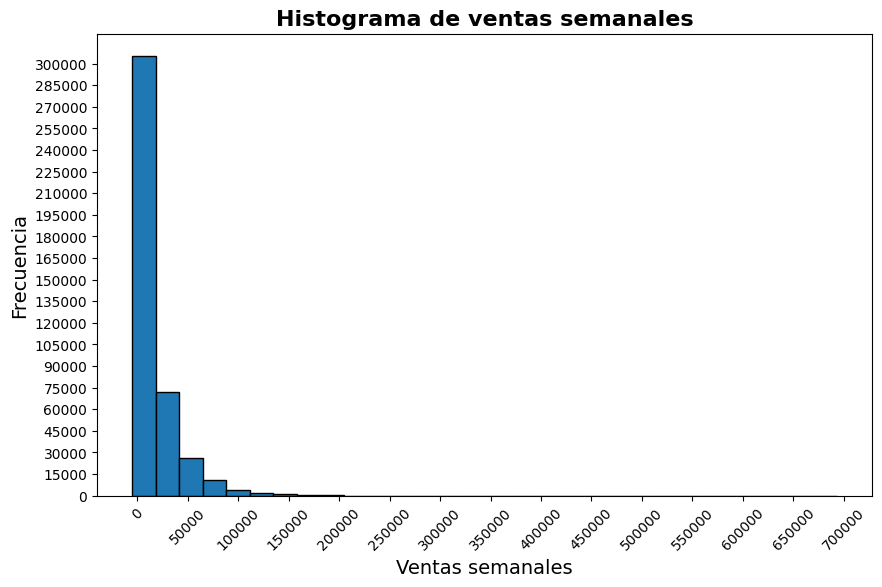

In [ ]:
# Histograma de las ventas
plt.figure(figsize=(10,6))
plt.hist(data.Weekly_Sales, 30, edgecolor='black')
plt.xlabel('Ventas semanales', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar intervalos de ticks (eje X)
plt.xticks(np.arange(0, 700001, 50000))

# Ajustar intervalos de ticks (eje Y)
plt.yticks(np.arange(0, 300001, 15000))

plt.ticklabel_format(style='plain', axis='both')
plt.title('Histograma de ventas semanales', fontsize=16, fontweight="bold")

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


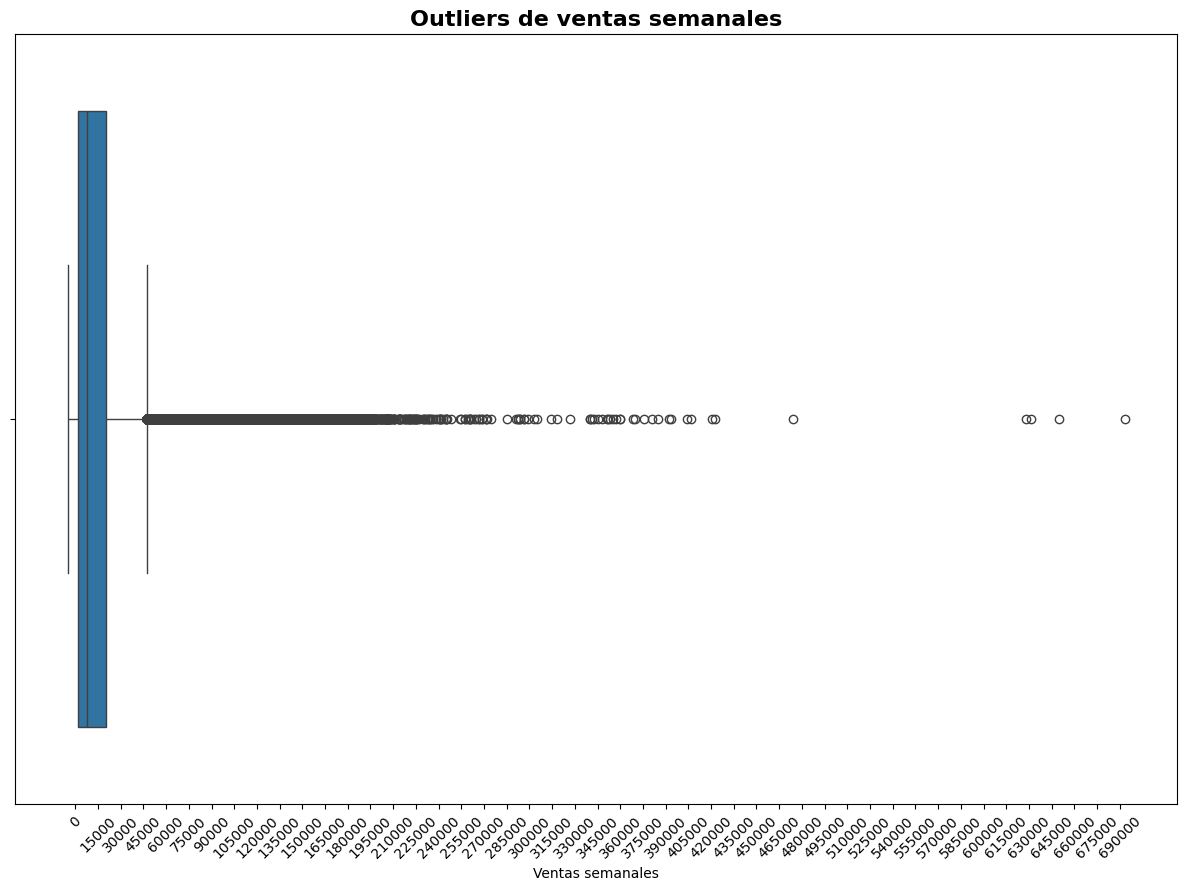

In [ ]:
# outliners ventas semanales
plt.figure(figsize=(15, 10))
sb.boxplot(x=data['Weekly_Sales'])
plt.title('Outliers de ventas semanales', fontsize=16, fontweight="bold");

plt.xlabel('Ventas semanales')
plt.xticks(np.arange(0, 700000, 15000))
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(data.Weekly_Sales), np.std(data.Weekly_Sales)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Extremo inferior {0:.1f} - Extremo superior : {1:.1f}".format(lim_inf, lim_sup))
# Busca las ocurrencias
analizados = data.query("Weekly_Sales >= {0} & Weekly_Sales <= {1}".format(lim_inf, lim_sup))['Weekly_Sales'].count()
total = data.shape[0]
print(analizados/total*100)

Extremo inferior -29441.1 - Extremo superior : 61403.6
95.0392580117181


In [ ]:
# Valores atipicos a eliminar
data.query('Weekly_Sales > 61403 ').index

Index([    17,     18,     21,     35,     44,     59,     67,     68,     99,
          107,
       ...
       418593, 418649, 418996, 419402, 419528, 419589, 419666, 419853, 419960,
       420454],
      dtype='int64', length=20914)

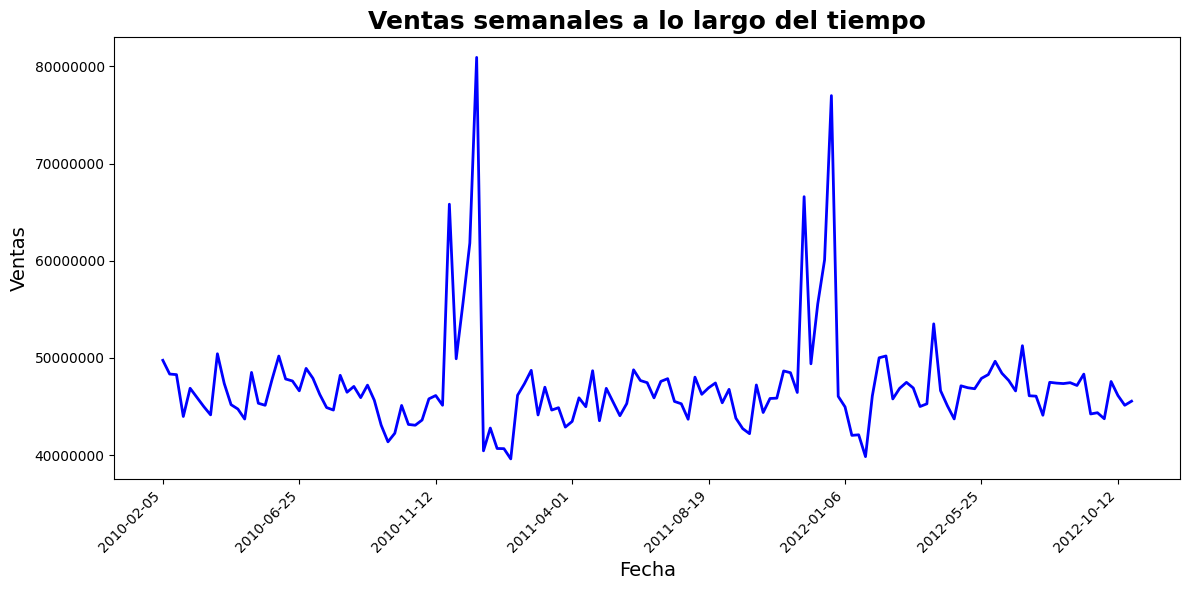

In [ ]:
# Ventas en el tiempo
plt.figure(figsize=(12, 6))

# Agrupar por la columna 'Date' y sumar las ventas semanales, graficando el resultado
data.groupby('Date')['Weekly_Sales'].sum().plot(color='blue', linewidth=2)

# Etiquetas de los ejes con ajuste de fuente y tamaño
plt.xlabel('Fecha', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ventas', fontsize=14)

# Ajuste de formato de los números en los ejes
plt.ticklabel_format(style='plain', axis='y')

plt.title("Ventas semanales a lo largo del tiempo", fontsize=18, fontweight="bold")

# Mejor ajuste de márgenes
plt.tight_layout()

plt.show()

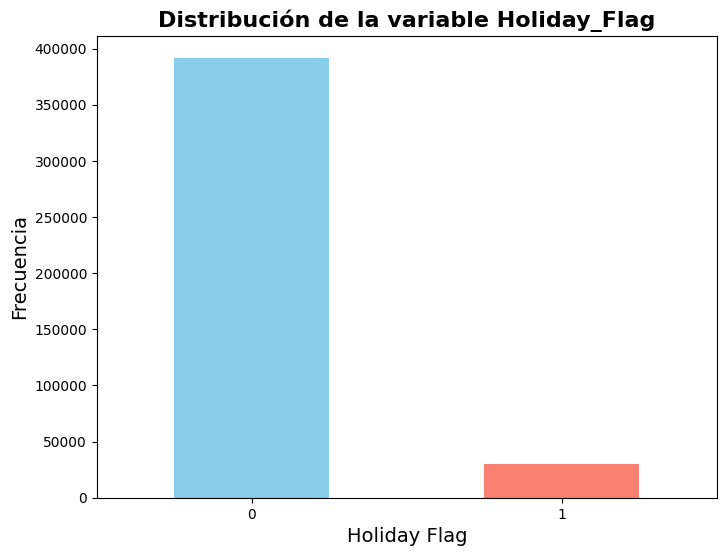

In [ ]:
# prompt: crea un grafico de barras para la variable isholiday

import matplotlib.pyplot as plt
# Gráfico de barras para la variable Holiday_Flag
plt.figure(figsize=(8, 6))
data['IsHoliday'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Holiday Flag', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de la variable Holiday_Flag', fontsize=16, fontweight="bold")
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

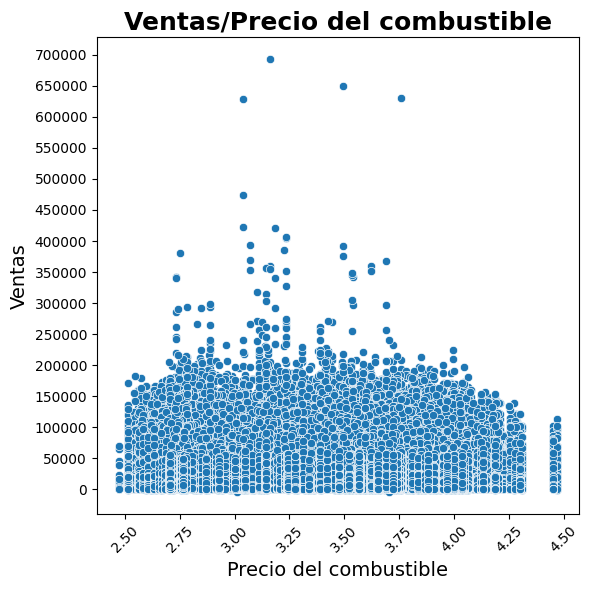

In [ ]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Precio del combustible', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Precio del combustible", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

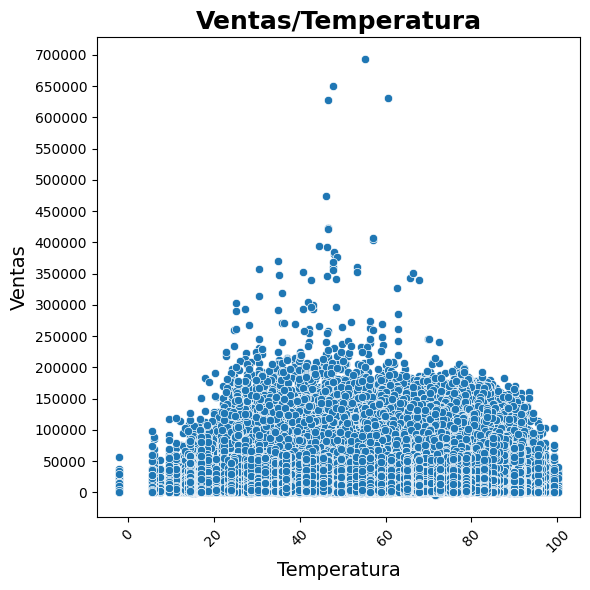

In [ ]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Temperatura', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Temperatura", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

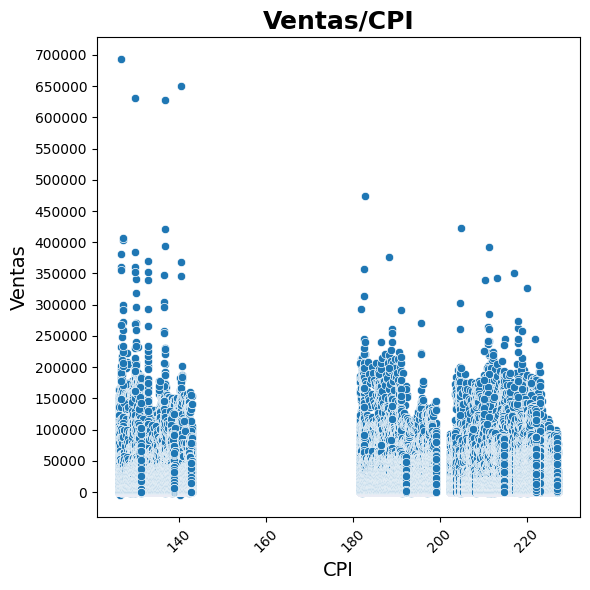

In [ ]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('CPI', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/CPI", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

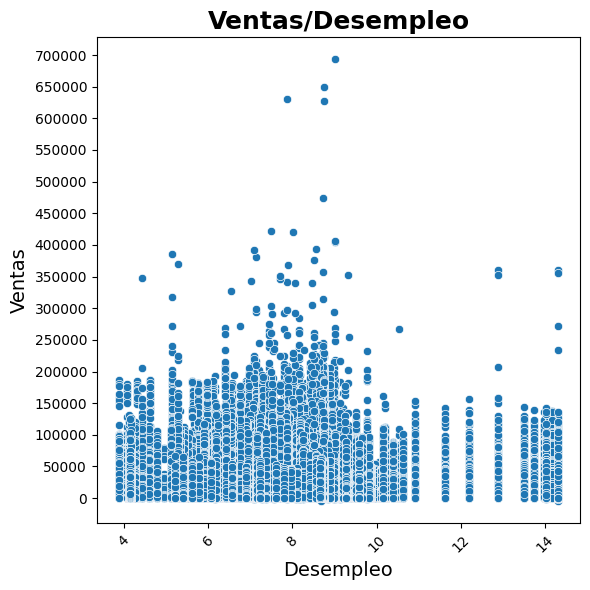

In [ ]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Desempleo', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Desempleo", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

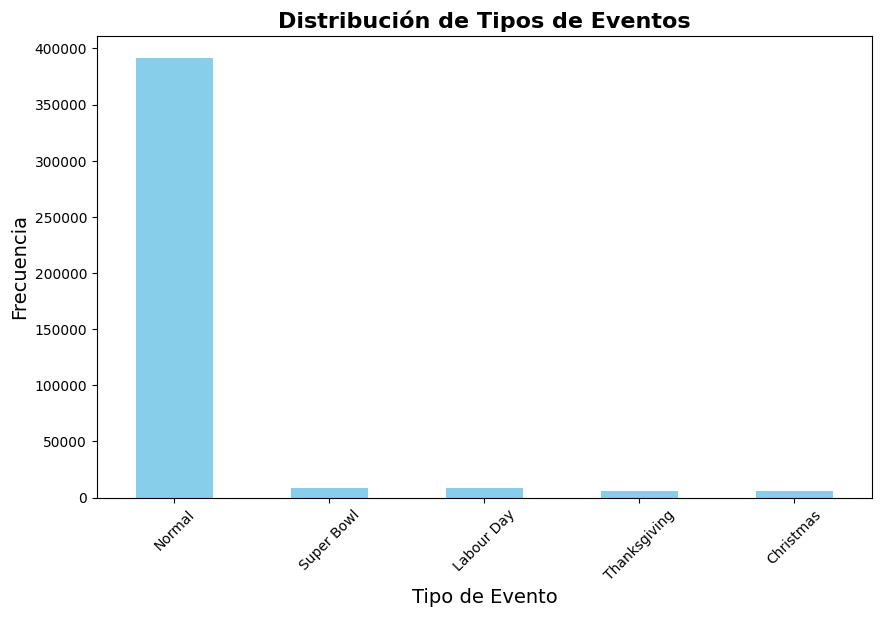

In [ ]:
plt.figure(figsize=(10, 6))
data['Event_Type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Evento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Tipos de Eventos', fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

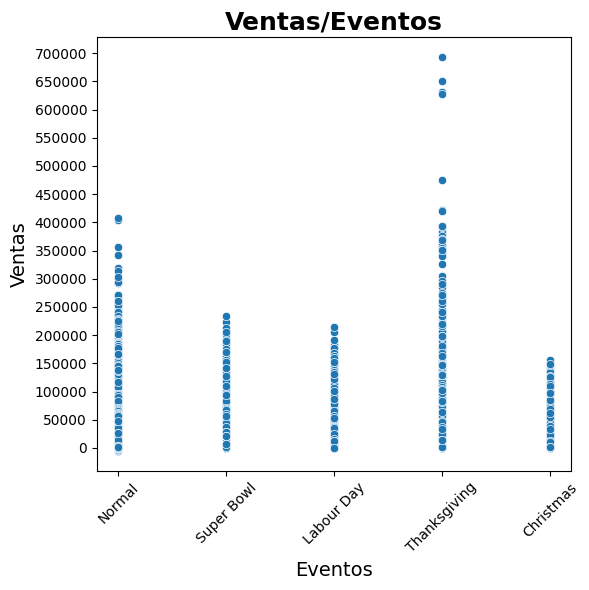

In [ ]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='Event_Type', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Eventos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Eventos", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

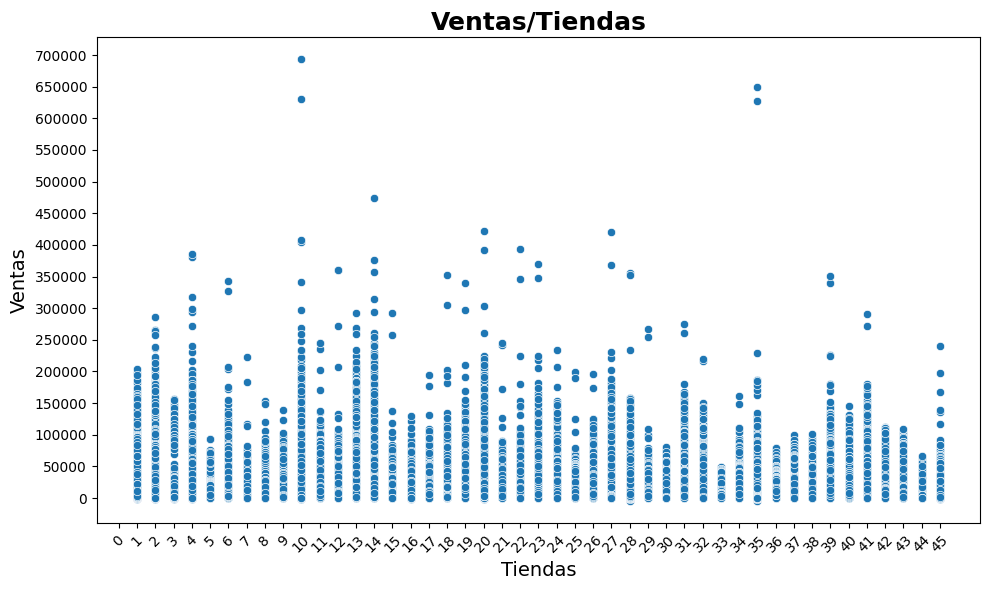

In [ ]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Store', y='Weekly_Sales', data=data)
plt.xticks(rotation=45)
plt.xlabel('Tiendas', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

plt.xticks(np.arange(0, 46, 1))
plt.yticks(np.arange(0, 700001, 50000))
plt.title("Ventas/Tiendas", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

## Análisis de Correlaciones

Matriz de correlación: Se calculará la matriz de correlación entre las variables numéricas para identificar relaciones lineales entre ellas.

In [ ]:
# Obtiene la matriz de correlación de las columnas numéricas
corr_matrix = data[data.describe().columns].corr()

# Extrae las correlaciones con la columna 'Weekly_Sales y las ordena de mayor a menor
corr_matrix["Weekly_Sales"].sort_values(ascending=False)

,Weekly_Sales
Weekly_Sales,1.000000
Size,0.243828
Type,0.182242
Dept,0.148032
MarkDown5,0.050465
MarkDown1,0.047172
MarkDown3,0.038562
MarkDown4,0.037467
MarkDown2,0.020716
IsHoliday,0.012774


# Fase 3 - Preparación de los datos



En esta fase, se preparan los datos para que sean adecuados para el entrenamiento de los modelos de regresión.
Se realizarán las siguientes acciones:

## Manejo de valores poco relevantes
Se identificarán los valores poco relevantes y se aplicarán estrategias para tratarlos:
* **Eliminar filas:** Eliminación de valores atipicos
* **Eliminar columnas:** Eliminación de columnas con cero aporte analitico


Para el modelo de variables numericas se tomaran las variables 'Store', 'Dept', 'Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size' y 'Fuel_Price'

Para el modelo de variables numericas y categoricas se tomaran las variables 'Store', 'Dept', 'Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Fuel_Price', 'Event_Type' y 'Date'

Explicación de la selección de variables

Variables numéricas:
* Store: Número de identificación de la tienda.
Se incluye porque la tienda puede influir en las ventas debido a diferentes características de ubicación, tamaño, etc.
* Dept: Número de departamento.
Se incluye ya que diferentes departamentos podrían tener diferentes patrones de ventas.
* Temperature: Temperatura registrada en el día de la venta. Puede afectar las ventas (ej: clima cálido para productos estacionales).
* CPI: Índice de precios al consumidor en la región.
Puede tener una influencia significativa en el poder adquisitivo de los clientes.
* Unemployment: Tasa de desempleo prevalente en ese momento. Puede afectar las ventas debido al poder adquisitivo de los clientes.
* Fuel_Price: El precio del combustible en la región. Podría influir en los gastos de los clientes y, por ende, en sus decisiones de compra.
* Size: Tamaño de la tienda. Se asume que tiendas más grandes podrían tener mayores ventas.

Variables categóricas:
* Event_Type: Tipo de evento asociado a la semana. Puede ser muy relevante porque eventos como Super Bowl, Labour Day, Thanksgiving, Christmas, etc., suelen tener un impacto importante en el comportamiento de los consumidores y las ventas.
* Date: Fecha de la semana. Puede ser importante, ya que el tiempo (mes, trimestre, año) puede influir en las ventas debido a diferentes tendencias estacionales y fluctuaciones económicas.
* Type: Tipo de tienda. Se incluye ya que diferentes tipos de tiendas podrían tener diferentes patrones de ventas.



In [ ]:
# Elimina las columnas con cero aporte analítico

#'Unnamed: 0', 'Date', 'Store', 'Dept', 'Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Event_Type', 'Fuel_Price'

df_final = data.drop(['Unnamed: 0', 'Date', 'Event_Type'], axis=1)

df_final_categorical = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Recupera la versión original de los datos
original_dt_final = df_final
original_dt_final_categorical = df_final_categorical

In [ ]:
df_final = original_dt_final
df_final_categorical = original_dt_final_categorical

In [ ]:
df_final.drop(df_final.query('Weekly_Sales <= 0').index, inplace=True)
df_final.drop(df_final.query('Weekly_Sales > 61403').index, inplace=True)

## Transformación de variables
Se pueden realizar transformaciones en las variables para mejorar el rendimiento de los modelos:

vamos a categorizar las variables Date y Event_Type para convertirlas en variables adecuadas para el entrenamiento.

En la variable date se decidio conventirla en variable numerica para asi poder mejorar la precision del modelo agregando asi las columnas de dia, mes, año y estacion del año

La categorización de la variable 'Event_Type' se realiza para convertirla en una entrada adecuada para los algoritmos de aprendizaje automático.

De esta manera, el modelo puede entender la influencia de cada tipo de evento en las ventas semanales.
Al categorizar la variable, se facilita el análisis de su impacto en la variable objetivo, 'Weekly_Sales'.

En general, la categorización de las variables ayuda a convertirlas en
entradas adecuadas para los algoritmos de aprendizaje automático, que
requieren entradas numéricas.


In [ ]:
# Transformamos la fecha a datos numericos

df_final_categorical['Date'] = pd.to_datetime(df_final_categorical['Date'])

df_final_categorical['Year'] = df_final_categorical['Date'].dt.year
df_final_categorical['Month'] = df_final_categorical['Date'].dt.month
df_final_categorical['Day'] = df_final_categorical['Date'].dt.day
df_final_categorical = df_final_categorical.drop('Date', axis=1)

In [ ]:
# categorizamos por temporada y le asignamos un valor codificado

def categorize_season(month):
  if month in [12, 1, 2]:
    return 'Invierno'
  elif month in [3, 4, 5]:
    return 'Primavera'
  elif month in [6, 7, 8]:
    return 'Verano'
  else:
    return 'Otoño'

# Aplicar la función a la columna 'Month'
df_final_categorical['Season'] = df_final_categorical['Month'].apply(categorize_season)

# Codificar la estación usando LabelEncoder
label_encoder = LabelEncoder()
df_final_categorical['Season_encoded'] = label_encoder.fit_transform(df_final_categorical['Season'])

df_final_categorical = df_final_categorical.drop('Season', axis=1)

# Mostrar el DataFrame resultante
df_final_categorical


,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Event_Type,Year,Month,Day,Season_encoded
0,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,2010,2,5,0
1,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,2010,2,5,0
2,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,2010,2,5,0
3,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,2010,2,5,0
4,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,Normal,2010,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,2012,10,26,1
421566,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,2012,10,26,1
421567,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,2012,10,26,1
421568,45,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,Normal,2012,10,26,1


In [ ]:
# categorizacion de los eventos del año

enc = OneHotEncoder(handle_unknown='ignore')

# Ajustar y transformar la columna 'Event_Type'
encoded_event_type = enc.fit_transform(df_final_categorical[['Event_Type']]).toarray()

# Crear un nuevo DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_event_type, columns=enc.get_feature_names_out(['Event_Type']))

# Concatenar el DataFrame original con el DataFrame codificado
df_final_categorical = pd.concat([df_final_categorical, encoded_df], axis=1)

# Eliminar la columna original 'Event_Type'
df_final_categorical = df_final_categorical.drop('Event_Type', axis=1)

# eliminación de valores atipicos
df_final_categorical.drop(df_final_categorical.query('Weekly_Sales <= 0').index, inplace=True)
df_final_categorical.drop(df_final_categorical.query('Weekly_Sales > 61403').index, inplace=True)

# Mostrar el DataFrame resultante
df_final_categorical


,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,Year,Month,Day,Season_encoded,Event_Type_Christmas,Event_Type_Labour Day,Event_Type_Normal,Event_Type_Super Bowl,Event_Type_Thanksgiving
0,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
1,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
2,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
3,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
4,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,...,118221,2012,10,26,1,0.0,0.0,1.0,0.0,0.0
421566,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,...,118221,2012,10,26,1,0.0,0.0,1.0,0.0,0.0
421567,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,...,118221,2012,10,26,1,0.0,0.0,1.0,0.0,0.0
421568,45,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,...,118221,2012,10,26,1,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Obtiene la matriz de correlación de las columnas
corr_matrix_C = df_final_categorical[df_final_categorical.describe().columns].corr()

# Extrae las correlaciones con la columna 'Weekly_Sales y las ordena de mayor a menor
corr_matrix_C["Weekly_Sales"].sort_values(ascending=False)

,Weekly_Sales
Weekly_Sales,1.000000
Size,0.218890
Type,0.155440
MarkDown1,0.041982
MarkDown5,0.041203
Dept,0.033768
MarkDown4,0.030413
Month,0.023171
MarkDown3,0.020582
MarkDown2,0.019910


## División de los datos
Se dividen los datos en conjuntos de entrenamiento y prueba:
* **Conjunto de entrenamiento:** Se usa para entrenar los modelos.
* **Conjunto de prueba:** Se usa para evaluar el rendimiento de los modelos.

In [ ]:
# Separa variables independientes de la dependiente
X = df_final.drop(["Weekly_Sales"], axis=1)
X.head()

,Store,IsHoliday,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,0,1.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,0,26.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,1,0,17.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,1,0,45.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,1,0,28.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [ ]:
y = df_final["Weekly_Sales"]
y.head()

,Weekly_Sales
0,24924.50
1,11737.12
2,13223.76
3,37.44
4,1085.29


In [ ]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=29)

In [ ]:
# Separa variables independientes de la dependiente
X_c = df_final_categorical.drop(["Weekly_Sales"], axis=1)
X_c.head()

,Store,IsHoliday,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Size,Year,Month,Day,Season_encoded,Event_Type_Christmas,Event_Type_Labour Day,Event_Type_Normal,Event_Type_Super Bowl,Event_Type_Thanksgiving
0,1,0,1.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
1,1,0,26.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
2,1,0,17.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
3,1,0,45.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0
4,1,0,28.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,151315,2010,2,5,0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_c = df_final_categorical["Weekly_Sales"]
y_c.head()

,Weekly_Sales
0,24924.50
1,11737.12
2,13223.76
3,37.44
4,1085.29


In [ ]:
# Separación en data de entrenamiento y test
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.33, random_state=29)

# Fase 4 - Modelamiento

In [ ]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  return f"""Modelo de regresión {algoritmo}
   {score :.2%} de la variabilidad en las ventas semanales se puede explicar utilizando las {len(caracteristicas)} características
   Características elegidas :{caracteristicas.values}."""

## Variante 1 - Uso sólo de variables numéricas

## Linear regressor


In [ ]:
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluación del modelo
print("R² of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R² of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R² of the Linear Regression on training set: 5.35%
R² of the Linear Regression on test set: 5.20%


In [ ]:
# Interpretación en el negocio
print(interpretacion("Regresión lineal", X_train.columns, linreg.score(X_test, y_test)))

Modelo de regresión Regresión lineal
   5.20% de la variabilidad en las ventas semanales se puede explicar utilizando las 14 características
   Características elegidas :['Store' 'IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1'
 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment'
 'Type' 'Size'].


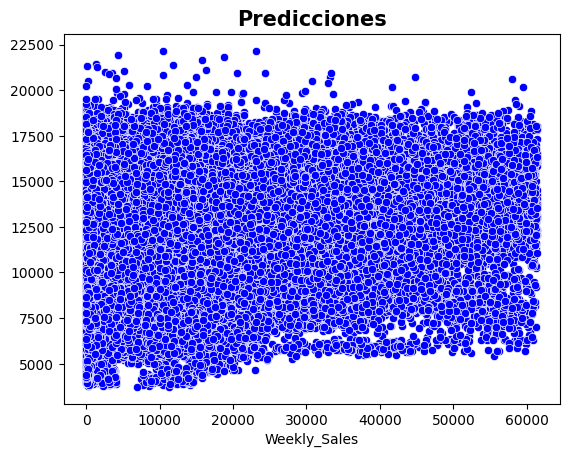

In [ ]:
# Realiza predicciones
y_pred = linreg.predict(X_test)

sb.scatterplot(x=y_test , y=y_pred, color="blue")

plt.title("Predicciones", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
historyV1 = {"LinearRegression" : [linreg, linreg.score(X_test, y_test)]}

historyV1

{'LinearRegression': [LinearRegression(), 0.05201301975821149]}

## Decision tree regressor


In [ ]:
# Creación del modelo
model_tree = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=29)

In [ ]:

# Evaluación del modelo
print("R² of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R² of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))

R² of the Decision Tree Regressor on training set: 100.00%
R² of the Decision Tree Regressor on test set: 92.40%


In [ ]:
# Interpretación en el negocio
print(interpretacion("Árbol de decisión", X_train.columns, model_tree.score(X_test, y_test)))

Modelo de regresión Árbol de decisión
   92.40% de la variabilidad en las ventas semanales se puede explicar utilizando las 14 características
   Características elegidas :['Store' 'IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1'
 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment'
 'Type' 'Size'].


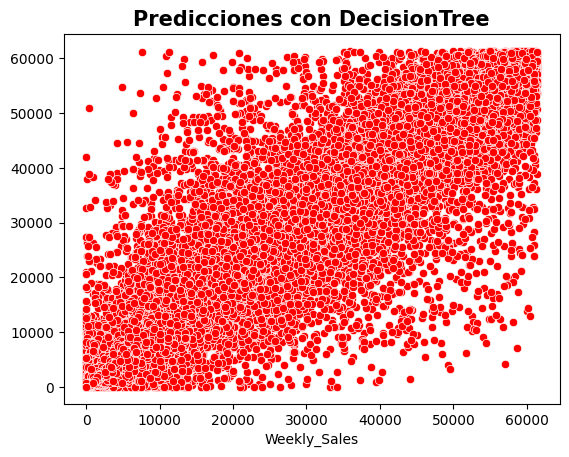

In [ ]:
# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
historyV1["DecisionTreeRegressor"] = [model_tree, model_tree.score(X_test, y_test)]
historyV1

{'LinearRegression': [LinearRegression(), 0.05201301975821149],
 'DecisionTreeRegressor': [DecisionTreeRegressor(random_state=29),
  0.923982911871099]}

## Random forest regressor

In [ ]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=29)

In [ ]:
# Evaluación
print("R² of the Random Forest Regressor on training set: {:.2%}".format(model_rf.score(X_train, y_train)))
print("R² of the Random Forest Regressor on test set: {:.2%}".format(model_rf.score(X_test, y_test)))


R² of the Random Forest Regressor on training set: 99.39%
R² of the Random Forest Regressor on test set: 95.73%


In [ ]:
# Interpretación en el negocio
print(interpretacion("RandomForest", X_train.columns, model_rf.score(X_test, y_test)))

Modelo de regresión RandomForest
   95.73% de la variabilidad en las ventas semanales se puede explicar utilizando las 14 características
   Características elegidas :['Store' 'IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1'
 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment'
 'Type' 'Size'].


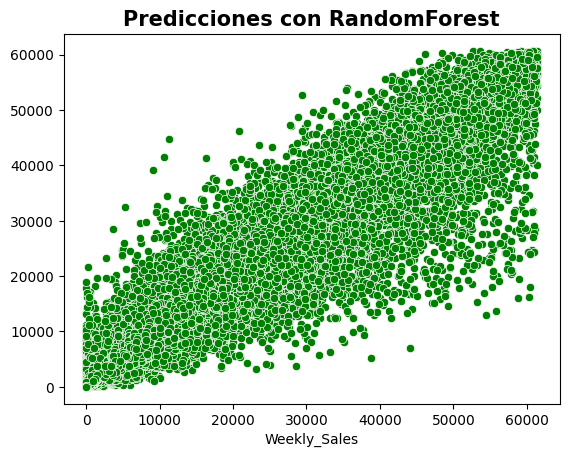

In [ ]:
y_pred_rf = model_rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
historyV1["RandomForestRegressor"] = [model_rf, model_rf.score(X_test, y_test)]
historyV1

{'LinearRegression': [LinearRegression(), 0.05201301975821149],
 'DecisionTreeRegressor': [DecisionTreeRegressor(random_state=29),
  0.923982911871099],
 'RandomForestRegressor': [RandomForestRegressor(random_state=29),
  0.957323197578379]}

## Variante 2 - Uso de variables numéricas y categórica


## Linear regressor

In [ ]:
# Creación del modelo
linreg_c = LinearRegression()
# Entrenamiento del modelo
linreg_c.fit(X_c_train, y_c_train)

LinearRegression()

In [ ]:
# Evaluación del modelo
print("R² of the Linear Regression on training set: {:.2%}".format(linreg_c.score(X_c_train, y_c_train)))
print("R² of the Linear Regression on test set: {:.2%}".format(linreg_c.score(X_c_test, y_c_test)))

R² of the Linear Regression on training set: 5.43%
R² of the Linear Regression on test set: 5.26%


In [ ]:
# Interpretación en el negocio
print(interpretacion("Regresión lineal C", X_c_train.columns, linreg_c.score(X_c_test, y_c_test)))

Modelo de regresión Regresión lineal C
   5.26% de la variabilidad en las ventas semanales se puede explicar utilizando las 23 características
   Características elegidas :['Store' 'IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1'
 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment'
 'Type' 'Size' 'Year' 'Month' 'Day' 'Season_encoded'
 'Event_Type_Christmas' 'Event_Type_Labour Day' 'Event_Type_Normal'
 'Event_Type_Super Bowl' 'Event_Type_Thanksgiving'].


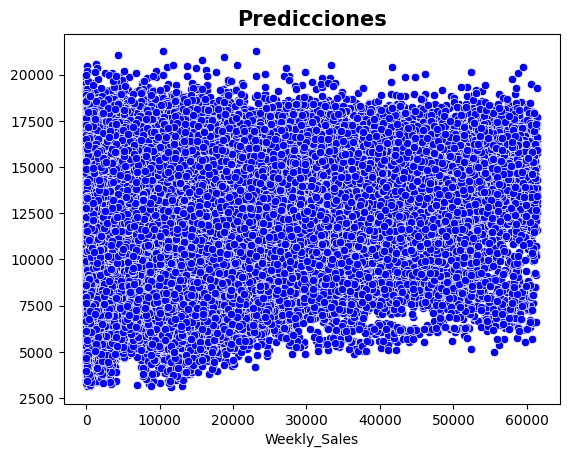

In [ ]:
# Realiza predicciones
y_c_pred = linreg_c.predict(X_c_test)


sb.scatterplot(x=y_c_test , y=y_c_pred, color="blue")

plt.title("Predicciones", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados

historyV2 = {"LinearRegression_Categorical" : [linreg_c, linreg_c.score(X_c_test, y_c_test)]}

historyV2

{'LinearRegression_Categorical': [LinearRegression(), 0.05262733486050397]}

## Decision tree regressor

In [ ]:
# Creación del modelo
model_tree_c = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
model_tree_c.fit(X_c_train, y_c_train)

DecisionTreeRegressor(random_state=29)

In [ ]:
# Evaluación del modelo
print("R² of the Decision Tree Regressor on training set: {:.2%}".format(model_tree_c.score(X_c_train, y_c_train)))
print("R² of the Decision Tree Regressor on test set: {:.2%}".format(model_tree_c.score(X_c_test, y_c_test)))

R² of the Decision Tree Regressor on training set: 100.00%
R² of the Decision Tree Regressor on test set: 95.26%


In [ ]:
# Interpretación en el negocio
print(interpretacion("Árbol de decisión", X_c_train.columns, model_tree_c.score(X_c_test, y_c_test)))

Modelo de regresión Árbol de decisión
   95.26% de la variabilidad en las ventas semanales se puede explicar utilizando las 23 características
   Características elegidas :['Store' 'IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1'
 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment'
 'Type' 'Size' 'Year' 'Month' 'Day' 'Season_encoded'
 'Event_Type_Christmas' 'Event_Type_Labour Day' 'Event_Type_Normal'
 'Event_Type_Super Bowl' 'Event_Type_Thanksgiving'].


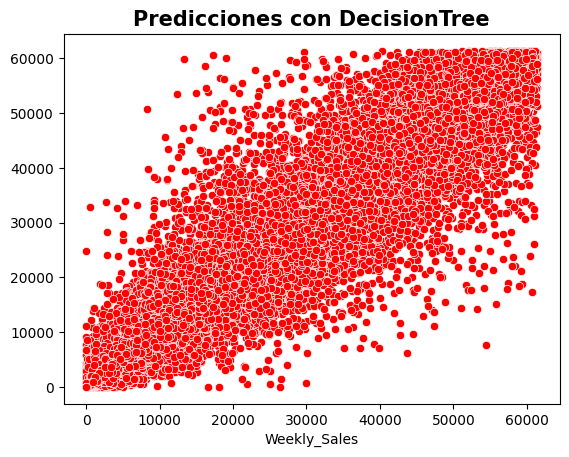

In [ ]:
# Realiza predicciones
y_c_pred_tree = model_tree_c.predict(X_c_test)
sb.scatterplot(x=y_c_test , y=y_c_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
historyV2["DecisionTreeRegressor_Categorical"] = [model_tree_c, model_tree_c.score(X_c_test, y_c_test)]
historyV2

{'LinearRegression_Categorical': [LinearRegression(), 0.05262733486050397],
 'DecisionTreeRegressor_Categorical': [DecisionTreeRegressor(random_state=29),
  0.952642964691799]}

## Random forest regressor

In [ ]:
# Creación del modelo
model_rf_c = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
model_rf_c.fit(X_c_train, y_c_train)

RandomForestRegressor(random_state=29)

In [ ]:
# Evaluación
print("R² of the Random Forest Regressor on training set: {:.2%}".format(model_rf_c.score(X_c_train, y_c_train)))
print("R² of the Random Forest Regressor on test set: {:.2%}".format(model_rf_c.score(X_c_test, y_c_test)))


R² of the Random Forest Regressor on training set: 99.63%
R² of the Random Forest Regressor on test set: 97.39%


In [ ]:

# Interpretación en el negocio
print(interpretacion("RandomForest C", X_c_train.columns, model_rf_c.score(X_c_test, y_c_test)))

Modelo de regresión RandomForest C
   97.39% de la variabilidad en las ventas semanales se puede explicar utilizando las 23 características
   Características elegidas :['Store' 'IsHoliday' 'Dept' 'Temperature' 'Fuel_Price' 'MarkDown1'
 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment'
 'Type' 'Size' 'Year' 'Month' 'Day' 'Season_encoded'
 'Event_Type_Christmas' 'Event_Type_Labour Day' 'Event_Type_Normal'
 'Event_Type_Super Bowl' 'Event_Type_Thanksgiving'].


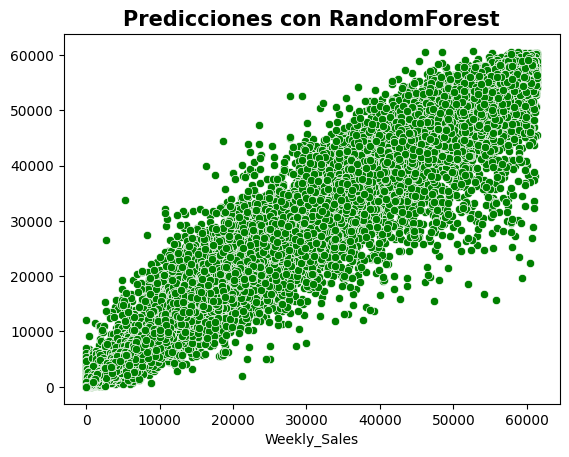

In [ ]:

y_c_pred_rf = model_rf_c.predict(X_c_test)
sb.scatterplot(x=y_c_test , y=y_c_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
historyV2["RandomForestRegressor_Categorical"] = [model_rf_c, model_rf_c.score(X_c_test, y_c_test)]
historyV2

{'LinearRegression_Categorical': [LinearRegression(), 0.05262733486050397],
 'DecisionTreeRegressor_Categorical': [DecisionTreeRegressor(random_state=29),
  0.952642964691799],
 'RandomForestRegressor_Categorical': [RandomForestRegressor(random_state=29),
  0.973903514583826]}

# Fase 5 - Evaluación

In [ ]:
def mae_interpretacion(modelo : str, value : float):
  print(f"El modelo '{modelo}' pudo predecir la ventas semanales en el conjunto de prueba con un error de ± $ {value:.2f} de las ventas reales.")

def msle_interpretacion(modelo : str, value : float):
  print(f"El modelo '{modelo}' pudo predecir la ventas semanales en el conjunto de prueba con un error de  ± {value: .2%} de las ventas reales.")

## Variante 1 - Uso sólo de variables numéricas

## Linear Regressor


In [ ]:
# Evaluando el Modelo de Regresión Lineal

d = {"real": y_test, "prediccion": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["delta"] = df_lr["prediccion"]-df_lr["real"]
df_lr

,real,prediccion,delta
291753,16392.51,8499.846212,-7892.663788
364916,20789.09,13967.114160,-6821.975840
406035,5836.19,8847.832747,3011.642747
111346,2192.02,12618.986099,10426.966099
419989,5868.87,10445.536662,4576.666662
...,...,...,...
336341,3391.45,10421.867855,7030.417855
262223,24193.99,16790.815071,-7403.174929
83003,867.94,11953.510340,11085.570340
122680,16067.56,16862.850461,795.290461


In [ ]:
mae_interpretacion("Regresión lineal", mean_absolute_error(y_test, y_pred))

El modelo 'Regresión lineal' pudo predecir la ventas semanales en el conjunto de prueba con un error de ± $ 10260.90 de las ventas reales.


In [ ]:
msle_interpretacion("Regresión lineal", mean_squared_log_error(y_test,y_pred))

El modelo 'Regresión lineal' pudo predecir la ventas semanales en el conjunto de prueba con un error de  ±  457.72% de las ventas reales.


## Decision tree regressor


In [ ]:

# Evaluando el Modelo de Árbol de Decisión de regresión
#
d = {"real": y_test, "prediccion": y_pred_tree}
df_dt = pd.DataFrame(data=d)
df_dt["delta"] = df_dt["prediccion"]-df_dt["real"]
df_dt

,real,prediccion,delta
291753,16392.51,17390.22,997.71
364916,20789.09,18884.84,-1904.25
406035,5836.19,5966.91,130.72
111346,2192.02,1902.50,-289.52
419989,5868.87,6677.02,808.15
...,...,...,...
336341,3391.45,3705.42,313.97
262223,24193.99,25540.42,1346.43
83003,867.94,745.70,-122.24
122680,16067.56,21094.98,5027.42


In [ ]:
mae_interpretacion("Árbol de decisión", mean_absolute_error(y_test, y_pred_tree))

El modelo 'Árbol de decisión' pudo predecir la ventas semanales en el conjunto de prueba con un error de ± $ 1803.30 de las ventas reales.


In [ ]:
msle_interpretacion("Árbol de decisión", mean_squared_log_error(y_test,y_pred_tree))

El modelo 'Árbol de decisión' pudo predecir la ventas semanales en el conjunto de prueba con un error de  ±  30.70% de las ventas reales.


## Random forest regressor

In [ ]:

# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"real": y_test, "prediccion": y_pred_rf}
df_rf = pd.DataFrame(data=d)
df_rf["delta"] = df_rf["prediccion"]-df_rf["real"]
df_rf

,real,prediccion,delta
291753,16392.51,18252.2734,1859.7634
364916,20789.09,19374.5915,-1414.4985
406035,5836.19,6158.8868,322.6968
111346,2192.02,2103.9553,-88.0647
419989,5868.87,7450.7735,1581.9035
...,...,...,...
336341,3391.45,3689.9095,298.4595
262223,24193.99,26157.5678,1963.5778
83003,867.94,974.0797,106.1397
122680,16067.56,19452.8475,3385.2875


In [ ]:
mae_interpretacion("RandomForest", mean_absolute_error(y_test, y_pred_rf))

El modelo 'RandomForest' pudo predecir la ventas semanales en el conjunto de prueba con un error de ± $ 1414.35 de las ventas reales.


In [ ]:
msle_interpretacion("RandomForest", mean_squared_log_error(y_test,y_pred_rf))

El modelo 'RandomForest' pudo predecir la ventas semanales en el conjunto de prueba con un error de  ±  26.76% de las ventas reales.


## Variante 2 - Uso de variables numéricas y categórica

## Linear Regressor


In [ ]:
# Evaluando el Modelo de Regresión Lineal

d = {"real": y_c_test, "prediccion": y_c_pred}
df_lr = pd.DataFrame(data=d)
df_lr["delta"] = df_lr["prediccion"]-df_lr["real"]
df_lr

,real,prediccion,delta
291753,16392.51,7920.727139,-8471.782861
364916,20789.09,13569.062528,-7220.027472
406035,5836.19,8947.876304,3111.686304
111346,2192.02,11912.936858,9720.916858
419989,5868.87,10261.879833,4393.009833
...,...,...,...
336341,3391.45,10798.754282,7407.304282
262223,24193.99,17073.107230,-7120.882770
83003,867.94,12157.952890,11290.012890
122680,16067.56,16899.728369,832.168369


In [ ]:
mae_interpretacion("Regresión lineal", mean_absolute_error(y_c_test, y_c_pred))

El modelo 'Regresión lineal' pudo predecir la ventas semanales en el conjunto de prueba con un error de ± $ 10256.88 de las ventas reales.


In [ ]:
msle_interpretacion("Regresión lineal", mean_squared_log_error(y_c_test,y_c_pred))

El modelo 'Regresión lineal' pudo predecir la ventas semanales en el conjunto de prueba con un error de  ±  457.29% de las ventas reales.


## Decision tree regressor

In [ ]:
# Evaluando el Modelo de Árbol de Decisión de regresión
#
d = {"real": y_c_test, "prediccion": y_c_pred_tree}
df_dt = pd.DataFrame(data=d)
df_dt["delta"] = df_dt["prediccion"]-df_dt["real"]
df_dt

,real,prediccion,delta
291753,16392.51,21126.53,4734.02
364916,20789.09,20188.91,-600.18
406035,5836.19,5710.93,-125.26
111346,2192.02,2184.64,-7.38
419989,5868.87,6338.68,469.81
...,...,...,...
336341,3391.45,3685.04,293.59
262223,24193.99,24701.50,507.51
83003,867.94,862.55,-5.39
122680,16067.56,21094.98,5027.42


In [ ]:
mae_interpretacion("Árbol de decisión", mean_absolute_error(y_c_test, y_c_pred_tree))

El modelo 'Árbol de decisión' pudo predecir la ventas semanales en el conjunto de prueba con un error de ± $ 1487.69 de las ventas reales.


In [ ]:
msle_interpretacion("Árbol de decisión", mean_squared_log_error(y_c_test,y_c_pred_tree))

El modelo 'Árbol de decisión' pudo predecir la ventas semanales en el conjunto de prueba con un error de  ±  22.27% de las ventas reales.


## Random forest regressor

In [ ]:
# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"real": y_c_test, "prediccion": y_c_pred_rf}
df_rf = pd.DataFrame(data=d)
df_rf["delta"] = df_rf["prediccion"]-df_rf["real"]
df_rf

,real,prediccion,delta
291753,16392.51,19017.9922,2625.4822
364916,20789.09,19903.8298,-885.2602
406035,5836.19,6012.9144,176.7244
111346,2192.02,2098.7560,-93.2640
419989,5868.87,7513.5335,1644.6635
...,...,...,...
336341,3391.45,3640.9216,249.4716
262223,24193.99,26886.7094,2692.7194
83003,867.94,855.4574,-12.4826
122680,16067.56,21018.2237,4950.6637


In [ ]:
mae_interpretacion("RandomForest", mean_absolute_error(y_c_test, y_c_pred_rf))

El modelo 'RandomForest' pudo predecir la ventas semanales en el conjunto de prueba con un error de ± $ 1130.92 de las ventas reales.


In [ ]:
msle_interpretacion("RandomForest", mean_squared_log_error(y_c_test,y_c_pred_rf))

El modelo 'RandomForest' pudo predecir la ventas semanales en el conjunto de prueba con un error de  ±  18.63% de las ventas reales.


# Definición del mejor modelo


In [ ]:
def get_bestModel( history: dict):
  # Inicializar una variable para almacenar el mayor valor
  mayor_valor = float('-inf')

  # Recorrer el diccionario
  for modelo, data in history.items():
    # Comparar el segundo elemento de la lista (data[1] almacena el score) con el mayor encontrado hasta ahora
    if data[1] > mayor_valor:
        mayor_valor = data[1]
        best_model = data[0]

  return best_model, mayor_valor, modelo

def evaluate_bestmodel(model, X_train, y_train, X_test, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  r2_train = model.score(X_train, y_train) * 100
  r2_test = model.score(X_test, y_test) * 100
  mae = mean_absolute_error(y_test, y_test_pred)
  msle = mean_squared_log_error(y_test, y_test_pred) * 100

  return r2_train, r2_test, mae, msle

## Mejor modelo V1


In [ ]:
best_modelV1, best_scoreV1, modelV1 = get_bestModel(historyV1)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_scoreV1, modelV1))

r2_trainV1, r2_testV1, maeV1, msleV1 = evaluate_bestmodel(best_modelV1, X_train, y_train, X_test, y_test)

data = {
    "Modelo": [modelV1],
    "R² Train (%)": [r2_trainV1],
    "R² Test (%)": [r2_testV1],
    "MAE": [maeV1],
    "MSLE (%)": [msleV1],
}

df_results = pd.DataFrame(data)
df_results

El mejor rendimiento es: 95.73% y le corresponde a RandomForestRegressor


,Modelo,R² Train (%),R² Test (%),MAE,MSLE (%)
0,RandomForestRegressor,99.388617,95.73232,1414.346512,26.759789


## Analísis del mejor modelo V1

 * R² en Train (99.39%) vs. R² en Test (95.73%): Hay una pequeña diferencia entre el rendimiento en entrenamiento y prueba, lo que sugiere que el modelo está generalizando relativamente bien. Aunque la diferencia es notable, no es extremadamente alta.

* El MAE en el conjunto de prueba es 1414.35. El valor absoluto del MAE indica el error promedio en unidades de las ventas semanales y por lo tanto la predicciones erroneas tienen un margen de error de 1414.35 lo cual para los datos de ventas semanales que tenemos es muy bajo.

* MSLE en el conjuto de prueba es 26.76%. El MSLE penaliza errores en términos relativos, pero 26.76% es un poco elevado para lo que se busca.

* La diferencia de R² entre entrenamiento y prueba es de 3.66%, Esta no es enorme, pero puede ser un indicio leve de overfitting, por lo tanto, El modelo podría estar ajustándose demasiado a los datos de entrenamiento.

## Mejor modelo V2


In [ ]:
best_modelV2, best_scoreV2, modelV2 = get_bestModel(historyV2)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_scoreV2, modelV2))

r2_trainV2, r2_testV2, maeV2, msleV2 = evaluate_bestmodel(best_modelV2, X_c_train, y_c_train, X_c_test, y_c_test)

data = {
    "Modelo": [modelV2],
    "R² Train (%)": [r2_trainV2],
    "R² Test (%)": [r2_testV2],
    "MAE": [maeV2],
    "MSLE (%)": [msleV2],
}

df_results = pd.DataFrame(data)
df_results

El mejor rendimiento es: 97.39% y le corresponde a RandomForestRegressor_Categorical


,Modelo,R² Train (%),R² Test (%),MAE,MSLE (%)
0,RandomForestRegressor_Categorical,99.627325,97.390351,1130.924553,18.625462


# Analísis del mejor modelo V2


* R² en Train (99.63%) vs. R² en Test (97.39%): La diferencia entre las métricas de entrenamiento y prueba es pequeña (2.24%), lo cual es una mejora respecto al modelo anterior. Esto indica que el modelo generaliza mejor y es menos probable que esté sobreajustado a los datos de entrenamiento.

* MAE en Test es 1130.92, por lo tanto, El error promedio es menor en este modelo en comparación con el anterior (1414.35), lo que significa que, en promedio, comete menos errores en sus predicciones.

* MSLE en Test es 18.63%. Esto es significativamente menor que en el modelo anterior (26.76%), lo que indica que el modelo maneja mejor las predicciones en términos relativos.

* La diferencia en R² es de 2.24% en R² la cual es aún más pequeña que en el primer modelo, lo que indica que este modelo está generalizando mejor y es menos propenso a overfitting.

* Mejoras en las métricas de error (MAE y MSLE): Este modelo tiene mejores resultados en ambas métricas, lo que indica que ha logrado una mejor precisión en las predicciones.

# Fase 6 - Deployment

## Variante 1 - Uso sólo de variables numéricas

In [ ]:
with open('inputV1.json', 'r') as file:

    inputV1 = json.load(file)
    df_V1 = pd.DataFrame(inputV1)

In [ ]:
df_V1

,Store,IsHoliday,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,0,1,72.5,3.45,5000,3000,0,0,0,220.3,5.2,1,151315
1,2,1,3,65.1,3.55,0,0,2000,1000,0,221.7,6.0,2,202307
2,3,0,5,80.2,3.60,0,4000,500,2000,1000,223.1,4.8,3,37392
3,4,1,8,68.3,3.50,0,500,0,0,0,222.0,5.7,2,205863
4,5,0,12,77.0,3.40,2000,0,0,0,0,221.3,5.4,3,34875


In [ ]:
predicciones = best_modelV1.predict(df_V1)

predicciones

array([27171.2077, 15430.4997, 13395.9956, 57850.1252,  2451.362 ])

In [ ]:
with open('outputV1.json', 'w') as file:
    json.dump(predicciones.tolist(), file)

In [ ]:
files.download('outputV1.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Variante 2 - Uso de variables numéricas y categórica

In [ ]:
with open('inputV2.json', 'r') as file:

    inputV2 = json.load(file)
    df_V2 = pd.DataFrame(inputV2)

In [ ]:
df_V2

,Store,IsHoliday,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Size,Year,Month,Day,Season_encoded,Event_Type_Christmas,Event_Type_Labour Day,Event_Type_Normal,Event_Type_Super Bowl,Event_Type_Thanksgiving
0,1,0,1,72.5,3.45,5000,3000,0,0,0,...,151315,2022,12,25,4,1,0,0,0,0
1,2,1,3,65.1,3.55,0,0,2000,1000,0,...,202307,2022,9,5,3,0,1,0,0,0
2,3,0,5,80.2,3.60,0,4000,500,2000,1000,...,37392,2023,2,12,1,0,0,0,1,0
3,4,1,8,68.3,3.50,0,500,0,0,0,...,205863,2023,11,23,4,0,0,0,0,1
4,5,0,12,77.0,3.40,2000,0,0,0,0,...,34875,2023,7,15,2,0,0,1,0,0


In [ ]:
predicciones_V2 = best_modelV2.predict(df_V2)

predicciones_V2

array([25118.7163, 34862.2042, 12531.0795, 58283.9894,  2413.5918])

In [ ]:
with open('outputV2.json', 'w') as file:
    json.dump(predicciones_V2.tolist(), file)

In [ ]:
files.download('outputV2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pregunta final

¿Qué modelo recomendaría utilizar para cumplir con el objetivo propuesto al inicio? Deberá justificar su respuesta

Basado en los resultados obtenidos en el notebook, se recomienda utilizar el modelo **RandomForestRegressor_Categorical** por los siguientes motivos:

1. **Equilibrio entre entrenamiento y prueba:**  
   Este modelo muestra un mejor balance entre el ajuste a los datos de entrenamiento y la capacidad de generalización en los datos de prueba. La diferencia en el rendimiento entre ambos conjuntos es pequeña, lo que sugiere un menor riesgo de overfitting comparado con otros modelos evaluados.

2. **Rendimiento superior en R²:**  
   El valor de R² en el conjunto de prueba es el más alto entre todos los modelos evaluados, lo que indica que explica una mayor proporción de la variación en las ventas semanales, reflejando una alta capacidad predictiva.

3. **Errores más bajos:**  
   El modelo reporta un MAE relativamente bajo, lo que sugiere que las predicciones, en promedio, están más cerca de los valores reales.  
   También presenta un MSLE bajo, lo que refuerza que las predicciones del modelo son precisas incluso cuando se consideran en términos relativos.

4. **Generalización adecuada:**  
   La pequeña diferencia entre el R² en el conjunto de entrenamiento y el de prueba sugiere que el modelo no está sobreajustado a los datos de entrenamiento. Si hubiera un problema de overfitting, se esperaría una mayor diferencia entre estos valores. Además, el alto valor de R² en el conjunto de prueba confirma que el modelo tiene un buen rendimiento en datos no vistos.

5. **Incorporación de variables categóricas:**  
   La inclusión de variables categóricas, como los tipos de eventos y las estaciones, permite al modelo capturar relaciones más complejas en los datos, mejorando potencialmente la precisión de las predicciones al ofrecer una representación más completa de las influencias sobre las ventas.

En resumen, dado su rendimiento en los distintos indicadores y su capacidad de generalización, el **RandomForestRegressor_Categorical** es el modelo más adecuado para cumplir con los objetivos planteados al inicio del proyecto.


